<figure>
  <IMG SRC="input/FAU.png" WIDTH=250 ALIGN="right">
</figure>

# Image Classification with Keras
    
*David B. Blumenthal*, *Suryadipto Sarkar*



## What is Tensorflow?


Tensorflow is an open-source end-to-end platform that facilitates designing and deploying Machine Learning models using Python.



## What is Keras?


Keras is an API built on top of TensorFlow, that supports deep learning.

In [ ]:
!unzip PET-IMAGES.zip

In [2]:
# IMPORT REQUIRED LIBRARIES:
# --------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
import numpy as np
from numpy import genfromtxt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
# import cv2
from PIL import Image
import imageio
import pandas as pd
import random
import pickle
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from skimage.io import imread_collection
import glob

## **Note:**
* This is the way to mount drive and read images directly from Google Drive. However, since we have 24,000 images, this will take a while. Therefore, we will work on a smaller subset of the images.

## Classification Dataset


We will make use of the popular 'Cats vs Dogs' classification dataset.

Dataset download link: https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

## <a name="ex1"></a>Exercise-1:

* Read all of the .jpeg and .png images from a folder.

* Save all of the images in a single list (i.e., a list of image arrays). Note that this is the most common way of working with data in python. We often save all of the data into numpy lists or dataframes or similar structures.

There are many ways of doing this. I have made use of **opencv** as it is one of the most popular Computer Vision libraries in python. Read more at: https://github.com/opencv/opencv

<a href="#ex1sol">Solution for Exercise 1</a>

## Handling pickle (or npy) data:

* We often need to run ML algorithms many times with little tweaks in the model.

* How do we achieve this? Of course, we could read the data every time and save it as a list as shown above.

* However, this is a very time-consuming approach.

* What is a better approach? Saving the data as a list of image arrays once, and save that for later use.



Read about the **`.pickle`** and **`.npy`** file types. (Here, we will use pickle - don't forget to import the **pickle** and **numpy** libraries.)


### Writing data to pickle file:

In [ ]:
# # SYNTAX:
# # -------
# pickle_out=open("data.pickle","wb")
# pickle.dump(data,pickle_out)
# pickle_out.close()

### Reading data from pickle file:

In [ ]:
# # SYNTAX:
# # -------
# data=pickle.load(open("data.pickle","rb"))

## <a name="ex2"></a>Exercise-2:

* Read in the training data(X) and corresponding labels(y).

<a href="#ex2sol">Solution for Exercise 2</a>

# Randomizing the data:

## <a name="ex3"></a> Exercise-3:

* Randomize the data while preserving the sample-wise label information.

<a href="#ex3sol">Solution for Exercise 3</a>

## <a name="ex4"></a> Exercise-4:

* Save shuffled data as pickle file for later use.

<a href="#ex4sol">Solution for Exercise 4</a>

# **CONVOLUTIONAL NEURAL NETWORKS (CNNs):**

## Why CNNs?

* Convert data to embeddings/ features
* Example: Converting images from pixel space to feature space
* Enhances learning, reduces dimensionality, represents the data better

<div>
    <img src="CNN-overview.jpeg" width="1000" height="1000"/>
</div><br><br>

# Components/ Layers:

## 1. Convolutional Layer:
* Helps extract local patterns in the data (here, image).
* Also helps reduce the number of features. But that is a byproduct of the convolution operation, it is not the main objective. The main objective is to extract meaningful local patterns.
+ #### **Note: If the image is an RGB (3-channel image), the convolved image is also 3-channel. If the input image is a gray (1-channel) image, the convolved image is also single-channeled.**
  + This is because the kernel is applied on each channel separately for convolution.

### 1.1 Input, output and the convolution operator as a black box:
**Inputs**: 
<ul>
    <li>Image ($\mathbf{I}$)</li>
    <li>Window (aka, "filter" or "kernel") ($\mathbf{W}$)</li>
</ul>

**Output**: 
<ul>
    <li>Feature map ($\mathbf{F}$)</li>
</ul>

**The convolution operator&mdash;what can we expect?:**<br>
$I*W=F$, where $*$ denotes the convolution operator.
<br><br>

### 1.2 The math behind the convolutional layer:
Q. What exactly is the convolution operation? <cite>[1,2]</cite><br>
A. The convolution operation implements a sliding window (aka, "filter" or "kernel") over the input image.<br>
$\Rightarrow$ **In other words**: Dot product of the kernel and the original image pixels at each position.


#### The convolution operation is formally defined as:
\begin{equation}
    F(x,y)=I*W=\sum_{l \in L}\sum_{w \in W}I(x+l, y+w)\cdot W(x,y)
\end{equation}
where, $I$: input image;<br>
$W$: input window of dimenaions $L \times W$;<br>
and, $F$: feature map<br><br>

### 1.2.3 Stride:
**Definition:** Stride is a hyperparameter that tells us how many pixel values the sliding window must be shifted by, during each step of the dot product generation, during the convolution step.
<div>
    <img src="stride.jpeg" width="1000" height="1000"/>
</div><br><br>

#### Significance of stride:
<ul>
    <li>$\mathbf{Stride = 1}$: Large resultant feature map</li>
    <li>$\mathbf{Stride = Input\;image\;dimensions\;(I_{L \times W})}$: Resultant feature map contains just one single element.</li>
<ul>
<br>

#### Impact of stride on output map:
$$F_{length}=\frac{I_L-W_L}{stride}+1$$
$$F_{width}=\frac{I_W-W_W}{stride}+1$$<br>
where, $I_L$ and $I_W$ are the length and width of the input image ($I_{L \times W}$);<br>
$W_L$ and $W_W$ are the length and width of the input window ($W_{L \times W}$);<br>
and, $F$ is the feature map after convolution between the image and the window.<br><br>

### 1.2.4 Padding:
Padding refers to the addition of extra pixels around the borders of the image.

#### Why do we need padding?
<ul>
    <li>Prevent information loss around the borders of the input image.</li>
    <li>Image keeps getting smaller, leading to lower resolution in the subsequent layers of the neural network.</li>
    <li>Most neural networks have scores of layers (sometimes hundreds of layers for moderately complex tasks)</li>
</ul>

#### Impact of padding on output map:
$$F_{length}=\frac{I_L-W_L+2 \times padding}{stride}+1$$
$$F_{width}=\frac{I_W-W_W+2 \times padding}{stride}+1$$<br>
where, $I_L$ and $I_W$ are the length and width of the input image ($I_{L \times W}$);<br>
$W_L$ and $W_W$ are the length and width of the input window ($W_{L \times W}$);<br>
and, $F$ is the feature map after convolution between the image and the window.

## 2. Pooling Layer:

* The main function of the pooling layer is to reduce dimensionality.
* Two popular types of pooling: MaxPooling, and AveragePooling.
* AveragePooling also helps in noise reduction.

<br>

#### **A simple example of Pooling:**
(Note: Pooling window size 3*3)
<div>
    <img src="pooling.jpeg" width="1000" height="1000"/>
</div><br><br>

## 3. Feedforward Layer:

<div>
    <img src="fcnn.jpeg" width="1000" height="1000"/>
</div>

* Standard Neural Network architecture used for classification.
* The building block of any neural network is the **neuron**.

### 3.1 The neuron:
Made up of two components:
* Weighted sum
* Activation functions

<div>
    <img src="Neuron.jpeg" width="600" height="600"/>
</div>

#### 3.1.1 Weighted sum:
$$z=W^TX+b$$
where, $W$: weight matrix;<br>
$X$: input matrix;<br>
and, $b$: bias of the model.<br>
**$\Rightarrow$Note: Both $W$ and $b$ are parameters learnt by the model (in this case, the neuron).**

#### 3.1.2 Activation function:
* Used for ***thresholding***.<br><br>
* Popular activation functions:
  1. **Sigmoid function:** \begin{equation} f(z)=\frac{1}{1+e^{-z}} \end{equation}
  2. **tanh:** \begin{equation} f(z)=tanh(z)=\frac{2}{1+e^{-2z}}-1 \end{equation}
  3. **Rectified Linear Unit (ReLU):** \begin{equation} f(z)=max(0,z) \end{equation}
  4. **Leaky ReLU:** \begin{equation} f(z)=max(\delta,z) \end{equation}
  5. **Exponential linear unit ELU):** \begin{equation}
  f(z) =
    \begin{cases}
      z & \text{if bank $z>0$}\\
      \delta (e^x-1) & \text{if $z \leq 0$}
    \end{cases}       
\end{equation}
  <!--6. $f(z)=z$ if $z>0$, and $f(z)=\delta (e^x-1)$ if $z \leq 0$-->
  6. **Softmax function:** $f(z)_i = \frac{e^z_i}{\sum_{j=1}^{K}{e^{z_j}}}$, where $K$ is the number of categories (aka "classes")
<br><br>***Note:*** $\delta$ is a small constant $\in [0, 1]$

<div>
    <img src="Activation_functions.jpeg" width="1200" height="1200"/>
</div>
<cite>Figure source: [4]</cite>

##### The simplest neuron is called a **"Perceptron"** (with activation function: **Heaviside step function**, aka **unit step function**):

\begin{equation}
  f(z) =
    \begin{cases}
      0 & \text{if bank $z<0$}\\
      1 & \text{if $z \geq 0$}
    \end{cases}       
\end{equation}

<div>
    <img src="heaviside_step_function.png" width="500"/>
</div>
<cite>Figure source: [5]</cite>

## **A simple CNN model:**
<div>
    <img src="cnn-model.jpeg" width="900" height="900"/>
</div><br><br>

#### Note on the 'Flatten' layer:
* This is really not a layer in the conventional sense, although it is defined in the **tensorflow.keras.layers**.
* This is a function used to convert the features (or weights) after pooling, to be fed into the aforementioned feedforward neural network for classification.
  * We will see this a little later when we design the model.

### Designing the model:

Epoch 1/50
29/29 [==============================] - 1s 25ms/step - loss: 0.6941 - accuracy: 0.5479 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/50
29/29 [==============================] - 1s 18ms/step - loss: 0.6751 - accuracy: 0.6169 - val_loss: 0.6708 - val_accuracy: 0.6200
Epoch 3/50
29/29 [==============================] - 1s 18ms/step - loss: 0.6574 - accuracy: 0.6180 - val_loss: 0.7294 - val_accuracy: 0.4900
Epoch 4/50
29/29 [==============================] - 1s 18ms/step - loss: 0.6405 - accuracy: 0.6258 - val_loss: 0.6479 - val_accuracy: 0.6200
Epoch 5/50
29/29 [==============================] - 1s 18ms/step - loss: 0.6038 - accuracy: 0.6815 - val_loss: 0.6495 - val_accuracy: 0.6500
Epoch 6/50
29/29 [==============================] - 1s 19ms/step - loss: 0.5741 - accuracy: 0.7238 - val_loss: 0.6624 - val_accuracy: 0.6100
Epoch 7/50
29/29 [==============================] - 1s 18ms/step - loss: 0.5658 - accuracy: 0.7105 - val_loss: 0.6213 - val_accuracy: 0.6800
Epoch 8/50
29

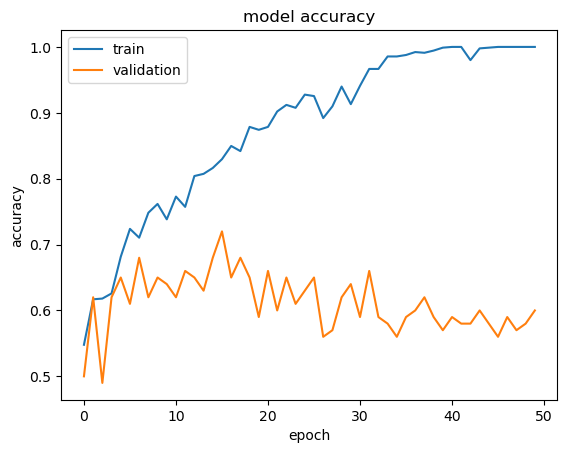

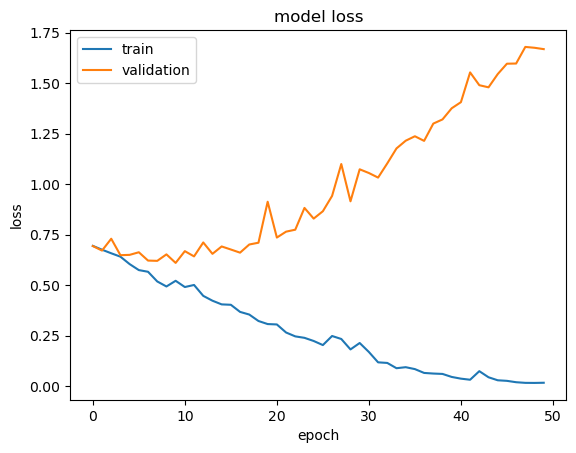

In [16]:
# X=pickle.load(open("X.pickle","rb"))
# y=pickle.load(open("y.pickle","rb"))

# Normalize data
X=np.asarray(X)/255.0
# X=X.tolist()

y = np.array(y)

model=Sequential()

model.add(  Conv2D(64,(3,3),input_shape=X.shape[1:])  )
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(  Conv2D(32,(2,2))    )
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('sigmoid'))

# model.add(Dense(64))
# model.add(Activation('sigmoid'))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

# callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# history=model.fit(X, y, batch_size=32, shuffle=True, sample_weight=None, epochs=50,validation_split=0.1, verbose = 1, callbacks=[callback]) # seed=100,         

history=model.fit(X, y, batch_size=32, shuffle=True, sample_weight=None, epochs=50,validation_split=0.1, verbose = 1) # seed=100,         


# model.fit(X,y,batch_size=32,epochs=25,validation_split=0.1)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## <a name="ex5"></a> Exercise-5:
* How many neurons are there in each of the aforementioned layers?

<a href="#ex5sol">Solution for Exercise 5</a>

## <a name="ex6"></a> Exercise-6:
* Why have we not used a Softmax layer?

<a href="#ex6sol">Solution for Exercise 6</a>

# Solutions:

<a name="ex1sol">Solution for Exercise 1</a>

In [3]:
# Simple way to read in all of the data:
# --------------------------------------

####################################################################################
CATS_folder='PET-IMAGES/Cat' # CATS_folder='Cat_folder_path' | # If reading from Drive: CATS_folder='/content/drive/MyDrive/PetImages/Cat'
DOGS_folder='PET-IMAGES/Dog' # DOGS_folder='Dog_folder_path' | # If reading from Drive: DOGS_folder='/content/drive/MyDrive/PetImages/Dog'

imdir = CATS_folder # or, DOGS_folder
ext = ['png', 'jpg'] # add other image formats for other datasets
files = []
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]
images = [cv2.imread(file) for file in files]
####################################################################################

<a href="#ex1">Back to Exercise 1</a>

<a name="ex2sol">Solution for Exercise 2</a>

In [13]:
X=pickle.load(open("input/X.pickle","rb"))
y=pickle.load(open("input/y.pickle","rb"))

<a href="#ex2">Back to Exercise 2</a>

<a name="ex3sol">Solution for Exercise 3</a>

In [14]:
def Shuffle(X, y):
    X_shuffled=[]
    y_shuffled=[]
    length=len(y)
    index=list(range(length))
    random.Random(12).shuffle(index)
    for i in range(length):
        X_shuffled.append(X[index[i]])
        y_shuffled.append(y[index[i]])
    return X_shuffled, y_shuffled
X, y=Shuffle(X, y)

<a href="#ex3">Back to Exercise 3</a>

<a name="ex4sol">Solution for Exercise 4</a>

In [7]:
# Save the training data
pickle_out=open("X_save.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()
# Save the training labels
pickle_out=open("y_save.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

<a href="#ex4">Back to Exercise 4</a>

<a name="ex5sol">Solution for Exercise 5</a>

* ***Conv-1***: 64, ***Conv2***: 32, ***Dense-1***: 128, ***Dense-2***: 1

<a href="#ex5">Back to Exercise 5</a>

<a name="ex6sol">Solution for Exercise 6</a>

Because in 2-class classification, the probabilities will anyway add up to 1 when using sigmoid function.

<a href="#ex6">Back to Exercise 6</a>

### References:
<ol>
    <li><a href="https://towardsdatascience.com/the-math-behind-convolutional-neural-networks-6aed775df076">The Math Behind Convolutional Neural Networks</a></li>
    <li><a href="https://arxiv.org/pdf/1511.08458.pdf">An Introduction to Convolutional Neural Networks</a></li>
    <li><a href="https://www.biorender.com">Image generated with BioRender.com</a></li>
    <li><a href="https://towardsdatascience.com/the-math-behind-neural-networks-a34a51b93873">The Math Behind Neural networks</a></li>
    <li><a href="https://en.wikipedia.org/wiki/Heaviside_step_function">Heaviside step function&mdash;Wikipedia</a></li>
</ol>

### Acknowledgements:

The materials in this notebook have been heavily utilized from:
<ul>
    <li><a href="https://medium.com/@cristianleo120">Christian Leo<a>'s blog post titled <a href="https://towardsdatascience.com/the-math-behind-convolutional-neural-networks-6aed775df076">The Math Behind Convolutional Neural Networks<a>.</li>
        <li>The paper titled <a href="https://arxiv.org/pdf/1511.08458.pdf">An Introduction to Convolutional Neural Networks<a> by Keiron O'Shea et al.</li>
</ul>


### Additional reading for interested readers:

#### Basic ideas behind machine learning and AI:
* What do we mean by 'learning' and 'intelligent' systems?
* What are the three main types of machine learning, and what are the differences?

#### Artificial neural networks:
* NN-related terms: Neurons, layers, activation functions, fully connected networks, multi-layer perceptron
* Hyperparameter tuning and model improvement basics: Learning rate, no. of neurons oer layer, how to set model size (i.e., no. and type of layers)
* Learning-related: Learning rate, backpropagation, gradient descent

#### Optional reading (slightly more advanced):
* What is transfer learning? What are pre-trained models, and how to use them? Why pre-trained models?
* What is overfitting? How to 1. detect 2. tackle overfitting?
  * Regularization, Dropout, resampling, oversampling (read about 'SMOTE') and undersampling, data augmentation techniques.